In [1]:
#Dependencies Imported
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime
import warnings
warnings.filterwarnings('ignore')
import scipy.stats as stats

In [3]:
#Drop NA Values
rent = pd.read_csv('Resources/Zip_ZORI_AllHomesPlusMultifamily_Smoothed.csv') 
rent.head()
rent.dropna()


,RegionID,RegionName,SizeRank,MsaName,2014-01,2014-02,2014-03,2014-04,2014-05,2014-06,...,2021-06,2021-07,2021-08,2021-09,2021-10,2021-11,2021-12,2022-01,2022-02,2022-03
0,61639,10025,1,"New York, NY",2989.0,2911.0,2998.0,3023.0,3013.0,3016.0,...,3119.0,3206.0,3281.0,3306.0,3367.0,3407.0,3450.0,3479.0,3574.0,3619.0
1,84654,60657,2,"Chicago, IL",1383.0,1415.0,1414.0,1423.0,1437.0,1472.0,...,1632.0,1637.0,1657.0,1654.0,1648.0,1663.0,1669.0,1704.0,1709.0,1739.0
2,61637,10023,3,"New York, NY",3298.0,3317.0,3360.0,3350.0,3369.0,3432.0,...,3362.0,3470.0,3558.0,3685.0,3786.0,3781.0,3864.0,3913.0,3947.0,4001.0
3,91982,77494,4,"Houston, TX",1416.0,1479.0,1486.0,1494.0,1468.0,1456.0,...,1589.0,1633.0,1655.0,1659.0,1683.0,1706.0,1700.0,1690.0,1705.0,1697.0
4,84616,60614,5,"Chicago, IL",1629.0,1654.0,1665.0,1677.0,1698.0,1714.0,...,1984.0,1988.0,2026.0,1998.0,2012.0,2027.0,2013.0,2042.0,2060.0,2124.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2215,95805,89109,9206,"Las Vegas, NV",1506.0,1597.0,1553.0,1519.0,1533.0,1540.0,...,1944.0,2027.0,2096.0,2134.0,2288.0,2187.0,2240.0,2333.0,2317.0,2367.0
2230,95839,89143,9791,"Las Vegas, NV",1177.0,1221.0,1191.0,1179.0,1190.0,1213.0,...,1967.0,2064.0,2129.0,2097.0,2072.0,2022.0,2036.0,2039.0,2102.0,2102.0
2234,99717,98327,10077,"Seattle, WA",1478.0,1451.0,1472.0,1470.0,1477.0,1484.0,...,2128.0,2125.0,2137.0,2116.0,2130.0,2139.0,2169.0,2197.0,2291.0,2354.0
2241,65794,19127,10697,"Philadelphia, PA",1629.0,1574.0,1607.0,1597.0,1581.0,1603.0,...,1962.0,1971.0,1985.0,2013.0,2013.0,2026.0,2098.0,2085.0,2073.0,2083.0


In [4]:
#Clean Data
rent_value_unpivoted = rent.melt(id_vars=['RegionID',  'RegionName','SizeRank', 'MsaName'], var_name='date', value_name='price')


In [5]:
#Dictionary Link: https://gist.github.com/sfirrin/fd01d87f022d80e98c37a045c14109fe
states_to_regions = {
    'Washington': 'West', 'Oregon': 'West', 'California': 'West', 'Nevada': 'West',
    'Idaho': 'West', 'Montana': 'West', 'Wyoming': 'West', 'Utah': 'West',
    'Colorado': 'West', 'Alaska': 'West', 'Hawaii': 'West', 'Maine': 'Northeast',
    'Vermont': 'Northeast', 'New York': 'Northeast', 'New Hampshire': 'Northeast',
    'Massachusetts': 'Northeast', 'Rhode Island': 'Northeast', 'Connecticut': 'Northeast',
    'New Jersey': 'Northeast', 'Pennsylvania': 'Northeast', 'North Dakota': 'Midwest',
    'South Dakota': 'Midwest', 'Nebraska': 'Midwest', 'Kansas': 'Midwest',
    'Minnesota': 'Midwest', 'Iowa': 'Midwest', 'Missouri': 'Midwest', 'Wisconsin': 'Midwest',
    'Illinois': 'Midwest', 'Michigan': 'Midwest', 'Indiana': 'Midwest', 'Ohio': 'Midwest',
    'West Virginia': 'South', 'District of Columbia': 'South', 'Maryland': 'South',
    'Virginia': 'South', 'Kentucky': 'South', 'Tennessee': 'South', 'North Carolina': 'South',
    'Mississippi': 'South', 'Arkansas': 'South', 'Louisiana': 'South', 'Alabama': 'South',
    'Georgia': 'South', 'South Carolina': 'South', 'Florida': 'South', 'Delaware': 'South',
    'Arizona': 'Southwest', 'New Mexico': 'Southwest', 'Oklahoma': 'Southwest',
    'Texas': 'Southwest'}

In [6]:
#Dictionary Link: https://gist.github.com/rogerallen/1583593
us_state_to_abbrev = {
    "Alabama": "AL",
    "Alaska": "AK",
    "Arizona": "AZ",
    "Arkansas": "AR",
    "California": "CA",
    "Colorado": "CO",
    "Connecticut": "CT",
    "Delaware": "DE",
    "Florida": "FL",
    "Georgia": "GA",
    "Hawaii": "HI",
    "Idaho": "ID",
    "Illinois": "IL",
    "Indiana": "IN",
    "Iowa": "IA",
    "Kansas": "KS",
    "Kentucky": "KY",
    "Louisiana": "LA",
    "Maine": "ME",
    "Maryland": "MD",
    "Massachusetts": "MA",
    "Michigan": "MI",
    "Minnesota": "MN",
    "Mississippi": "MS",
    "Missouri": "MO",
    "Montana": "MT",
    "Nebraska": "NE",
    "Nevada": "NV",
    "New Hampshire": "NH",
    "New Jersey": "NJ",
    "New Mexico": "NM",
    "New York": "NY",
    "North Carolina": "NC",
    "North Dakota": "ND",
    "Ohio": "OH",
    "Oklahoma": "OK",
    "Oregon": "OR",
    "Pennsylvania": "PA",
    "Rhode Island": "RI",
    "South Carolina": "SC",
    "South Dakota": "SD",
    "Tennessee": "TN",
    "Texas": "TX",
    "Utah": "UT",
    "Vermont": "VT",
    "Virginia": "VA",
    "Washington": "WA",
    "West Virginia": "WV",
    "Wisconsin": "WI",
    "Wyoming": "WY",
    "District of Columbia": "DC",
    "American Samoa": "AS",
    "Guam": "GU",
    "Northern Mariana Islands": "MP",
    "Puerto Rico": "PR",
    "United States Minor Outlying Islands": "UM",
    "U.S. Virgin Islands": "VI",
}

abbrev_to_us_state = dict(map(reversed, us_state_to_abbrev.items()))

In [7]:
#Create a column for 'State Abbreviations'
rent_value_unpivoted['State Abbreviation'] =rent_value_unpivoted['MsaName'].apply(lambda x:x.split(', ')[1])
#Created a state column
rent_value_unpivoted['State']=rent_value_unpivoted['State Abbreviation'].map(abbrev_to_us_state)
#Create a column with the regions
rent_value_unpivoted['Region']=rent_value_unpivoted['State'].map(states_to_regions)
rent_value_unpivoted

,RegionID,RegionName,SizeRank,MsaName,date,price,State Abbreviation,State,Region
0,61639,10025,1,"New York, NY",2014-01,2989.0,NY,New York,Northeast
1,84654,60657,2,"Chicago, IL",2014-01,1383.0,IL,Illinois,Midwest
2,61637,10023,3,"New York, NY",2014-01,3298.0,NY,New York,Northeast
3,91982,77494,4,"Houston, TX",2014-01,1416.0,TX,Texas,Southwest
4,84616,60614,5,"Chicago, IL",2014-01,1629.0,IL,Illinois,Midwest
...,...,...,...,...,...,...,...,...,...
222646,96956,92624,10854,"Los Angeles-Long Beach-Anaheim, CA",2022-03,6227.0,CA,California,West
222647,61773,10282,11874,"New York, NY",2022-03,6481.0,NY,New York,Northeast
222648,84608,60606,11991,"Chicago, IL",2022-03,2245.0,IL,Illinois,Midwest
222649,61620,10006,12013,"New York, NY",2022-03,3711.0,NY,New York,Northeast


In [8]:
#Groupby Region
avergae_region = rent_value_unpivoted.groupby('Region')['price'].mean().round(2)
average_region_values = avergae_region.sort_values(ascending = True)
average_region_values

Region
Midwest      1256.75
Southwest    1309.62
South        1487.75
West         2035.65
Northeast    2206.22
Name: price, dtype: float64

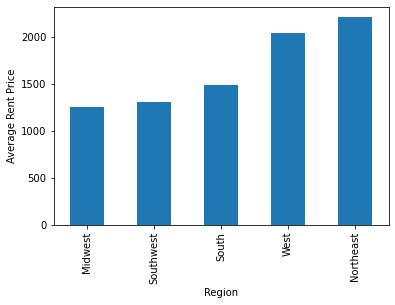

In [9]:
#Bar Chart for rent values of different regions
average_region_values.plot(kind="bar")
plt.xlabel("Region")
plt.xticks(rotation=90)
plt.ylabel("Average Rent Price")
plt.show()

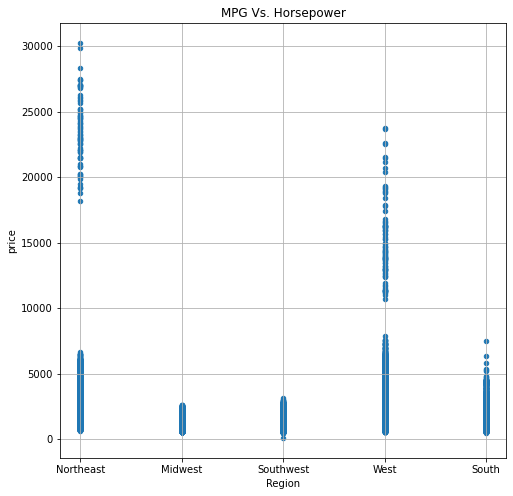

In [10]:
rent_value_unpivoted.plot(kind="scatter", x="Region", y="price", grid=True, figsize=(8,8),
              title="MPG Vs. Horsepower")
plt.show()

In [41]:
#Groupby State
avergae_state = rent_value_unpivoted.groupby('State Abbreviation')['price'].mean().round(2)
average_state_values = avergae_state.sort_values(ascending = False)

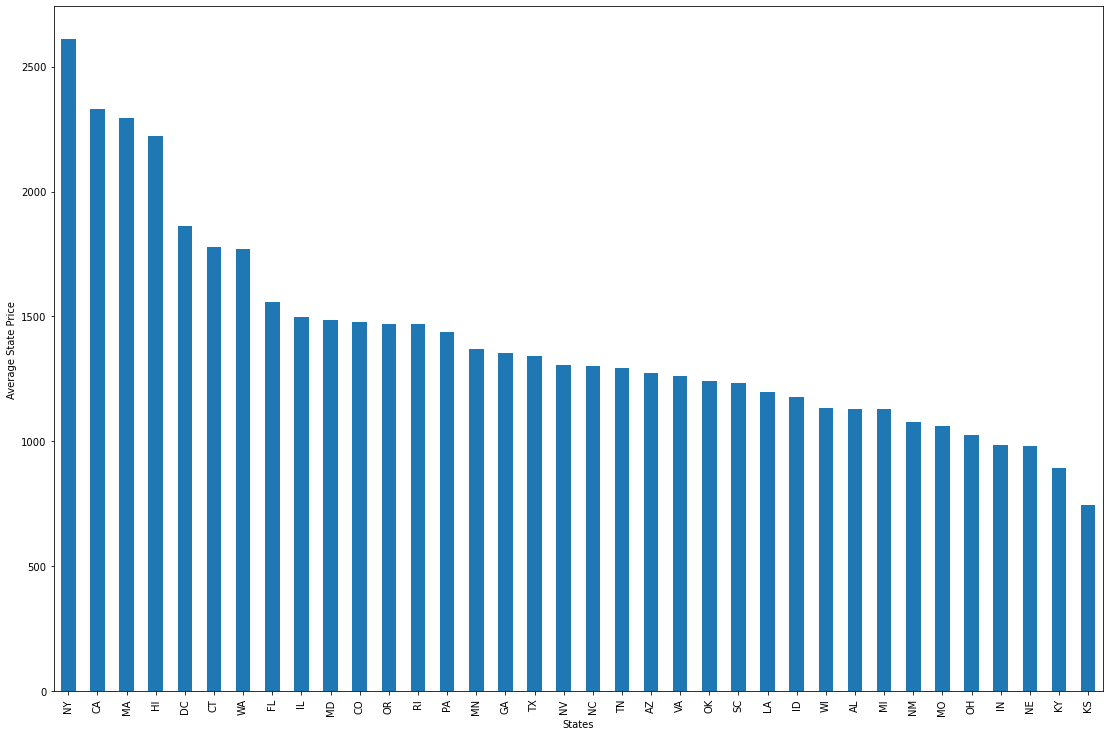

In [42]:
#Barchart: Average Rent Prices by State
average_state_values.plot(kind="bar", figsize=(18.8,12.6))
plt.xlabel("States")
plt.xticks(rotation=90)
plt.ylabel("Average State Price")
plt.show()



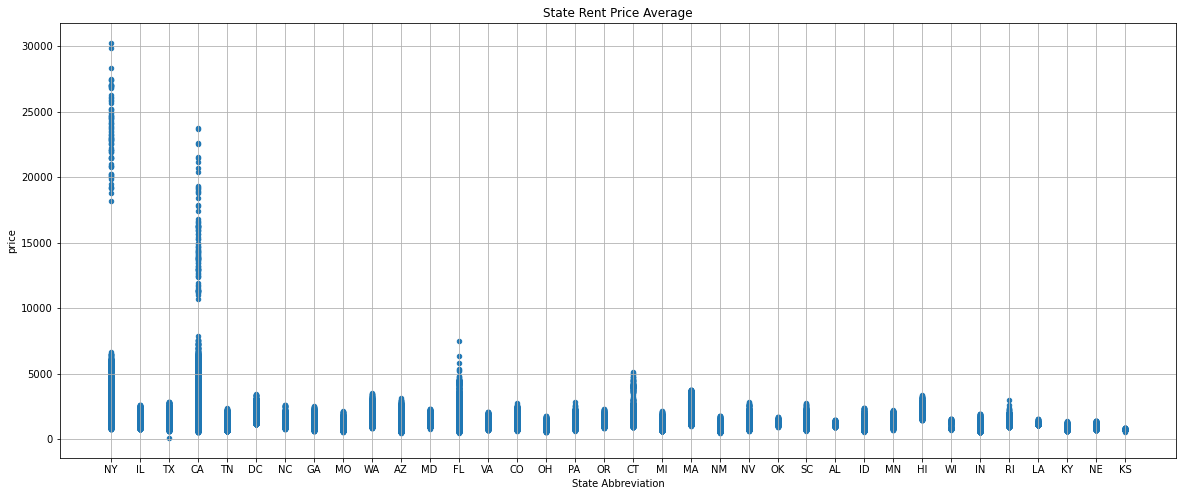

In [46]:
rent_value_unpivoted.plot(kind="scatter", x="State Abbreviation", y="price", grid=True, figsize=(20,8),
              title="State Rent Price Average")
plt.show()

In [47]:
#Create DF for California Cities
cali_cityt_rent_df = rent_value_unpivoted.loc[rent_value_unpivoted['MsaName'].str.split(', ',expand = True)[1] == "CA"]


In [50]:
#Find rent average of California Cities
cali_city_average = cali_cityt_rent_df.groupby('MsaName')['price'].mean().round(2)
cali_city_average_values = cali_city_average.sort_values(ascending = True)
cali_cityt_rent_df
cali_city_average

MsaName
Bakersfield, CA                        973.96
Los Angeles-Long Beach-Anaheim, CA    2479.34
Riverside, CA                         1755.69
Sacramento, CA                        1660.75
San Diego, CA                         2172.22
San Francisco, CA                     2959.33
San Jose, CA                          2954.16
Stockton, CA                          1974.03
Ventura, CA                           2473.54
Name: price, dtype: float64

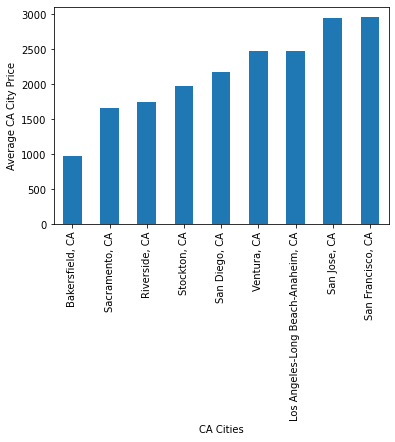

In [16]:
cali_city_average_values.plot(kind="bar")
plt.xlabel("CA Cities")
plt.xticks(rotation=90)
plt.ylabel("Average CA City Price")
plt.show()

In [49]:
cali_city_average.to_csv()